In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#!pip install yfinance
import yfinance as yf
from datetime import datetime
import pandas as pd
from numpy import concatenate
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

[*********************100%***********************]  1 of 1 completed


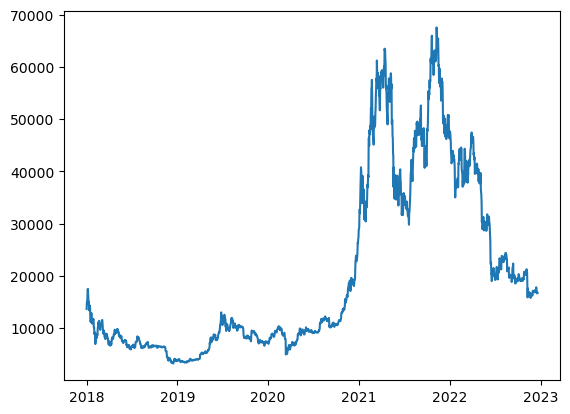

In [31]:
#data

today = datetime.today().strftime('%Y-%m-%d')
idx = pd.date_range('2018-01-01', today)

df_A = yf.download("BTC-USD", start="2018-01-01", end=today)["Close"]
df_A = df_A.reindex(idx, fill_value=0, method="nearest")

plt.plot(df_A)

In [32]:
timeseries = pd.concat([df_A], axis=1)
timeseries.columns = (["close-btc"])
#timeseries["close-btc-out"] = timeseries["close-btc"].shift(-1)
timeseries.head()

,close-btc
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


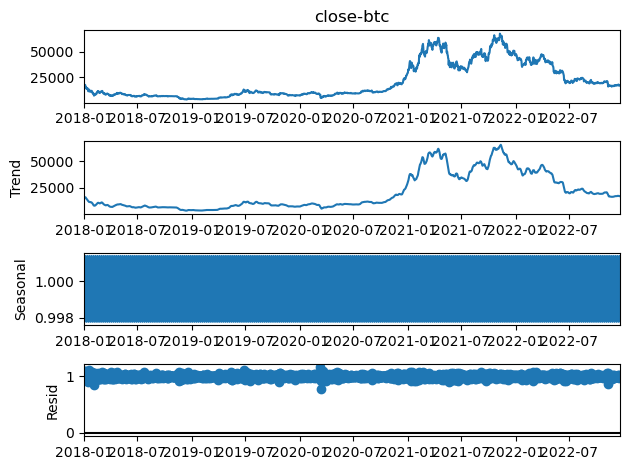

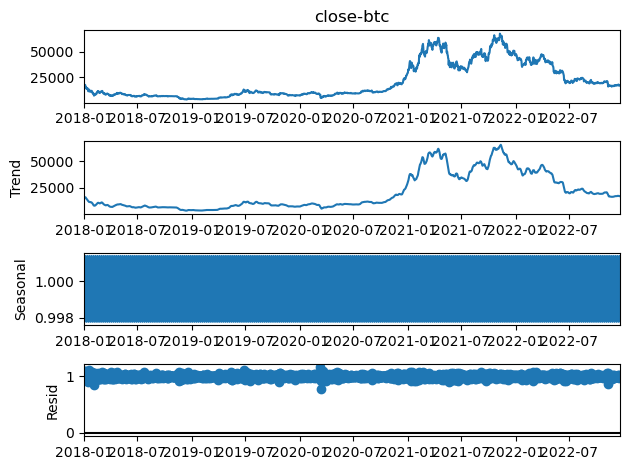

In [33]:
# ETS Decomposition
result = seasonal_decompose(timeseries['close-btc'], 
                            model ='multiplicative')
  
# ETS plot 
result.plot()

In [34]:
# Split data into train / test sets
train = timeseries.iloc[:len(timeseries)-1200]
test = timeseries.iloc[len(timeseries)-1200:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['close-btc'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30627D+00    |proj g|=  8.67686D-02


 This problem is unconstrained.



At iterate    5    f=  7.27763D+00    |proj g|=  2.94668D-02

At iterate   10    f=  7.27474D+00    |proj g|=  1.06373D-03

At iterate   15    f=  7.25415D+00    |proj g|=  1.31075D-01

At iterate   20    f=  7.21934D+00    |proj g|=  6.01662D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   2.158D-05   7.219D+00
  F =   7.2192803650968687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          close-btc   No. Observations:                  614
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -4432.638
Date:                            Mon, 19 Dec 2022   AIC                           8875.276
Time:                                    15:39:46   BIC                           8897.269
Sample:                                01-01-2018   HQIC                          8883.837
                                     - 09-06-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0079      0.022     -0.356      0.722      -0.052       0.036
ar.S.L12       0.0124      0.032      0.381      0.703      -0.051       0.076
ar.S.L24      -0.0615      0.033     -1.884      0.060      -0.126       0.002
ma.S.L12      -0.9978      0.297     -3.355      0.001      -1.581      -0.415
sigma2      1.339e+05   3.76e+04      3.561      0.000    6.02e+04    2.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               748.51
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: >

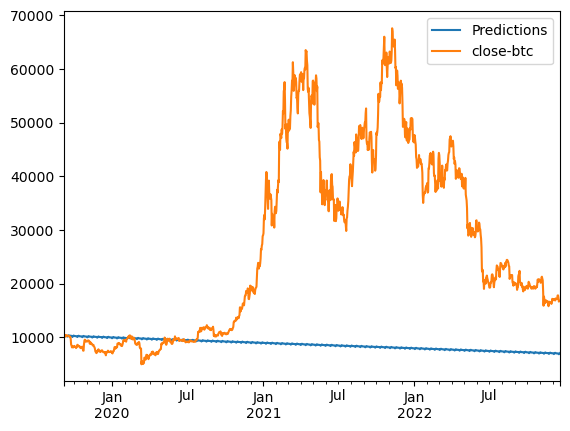

In [35]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['close-btc'].plot(legend = True)

In [36]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test['close-btc'], predictions)
  
# Calculate mean squared error
mean_squared_error(test['close-btc'], predictions)

659419891.1039538

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44539D+00    |proj g|=  5.94942D-02

At iterate    5    f=  8.41194D+00    |proj g|=  9.46098D-03

At iterate   10    f=  8.40503D+00    |proj g|=  3.11194D-03

At iterate   15    f=  8.40487D+00    |proj g|=  3.49396D-04

At iterate   20    f=  8.40389D+00    |proj g|=  6.24979D-03

At iterate   25    f=  8.30900D+00    |proj g|=  1.52263D-01

At iterate   30    f=  8.29642D+00    |proj g|=  3.91838D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<AxesSubplot: >

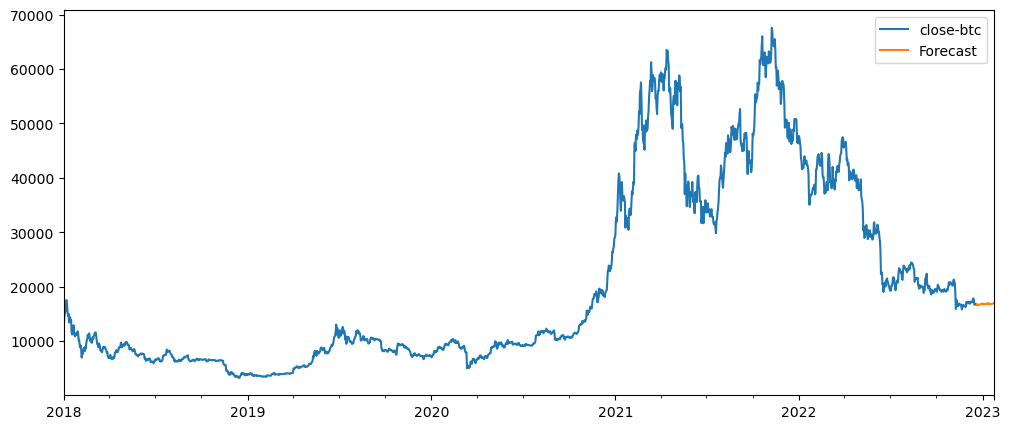

In [37]:
# Train the model on the full dataset
model = model = SARIMAX(timeseries['close-btc'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(timeseries), 
                          end = (len(timeseries)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
timeseries['close-btc'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)